# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data statistics

In [2]:
validated_data = pd.read_csv('../data/raw/cv-corpus-20.0-2024-12-06/th/validated.tsv', sep='\t')

/var/folders/cm/lb23lq6s6f319w__2lgw1zfm0000gn/T/ipykernel_54429/1241631071.py:1: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  validated_data = pd.read_csv('../data/raw/cv-corpus-20.0-2024-12-06/th/validated.tsv', sep='\t')


In [3]:
total = validated_data['client_id'].count()
unique = validated_data['client_id'].nunique()
print(f"Total entries: {total:,}")
print(f"Unique clients: {unique:,}")

Total entries: 148,057
Unique clients: 6,486


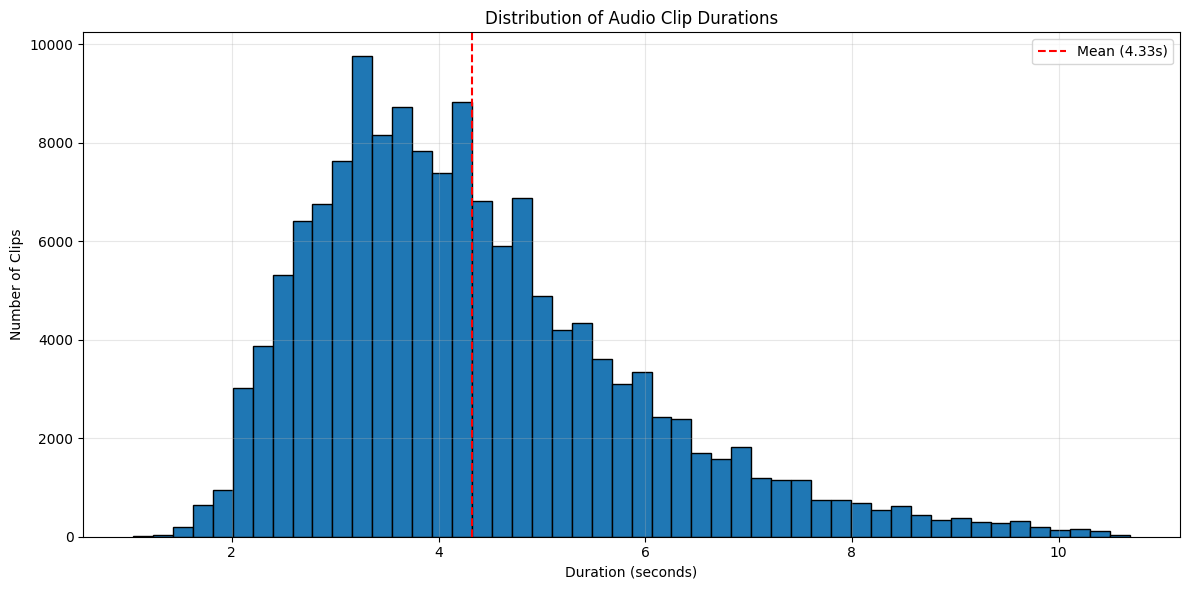

Number of clips: 148,057
Shortest audio duration: 1.04 seconds
Longest audio duration: 10.69 seconds
Average audio duration: 4.33 seconds


In [4]:
# Read clip_duration data and merge with validated_data
clip_duration = pd.read_csv('../data/raw/cv-corpus-20.0-2024-12-06/th/clip_durations.tsv', sep='\t')
merged_data = validated_data.merge(clip_duration, left_on='path', right_on='clip', how='left')

# Convert duration from milliseconds to seconds
merged_data['duration'] = merged_data['duration[ms]'] / 1000.0

# Analysis about shortest, longest and average audio duration
min_duration = merged_data['duration'].min()
max_duration = merged_data['duration'].max()
avg_duration = merged_data['duration'].mean()


plt.figure(figsize=(12, 6))
plt.hist(merged_data['duration'], bins=50, edgecolor='black')
plt.axvline(x=avg_duration, color='r', linestyle='--', label=f'Mean ({avg_duration:.2f}s)')

plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Clips')
plt.title('Distribution of Audio Clip Durations')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics about the distribution
print(f"Number of clips: {len(merged_data):,}")
print(f"Shortest audio duration: {min_duration:.2f} seconds")
print(f"Longest audio duration: {max_duration:.2f} seconds")
print(f"Average audio duration: {avg_duration:.2f} seconds")

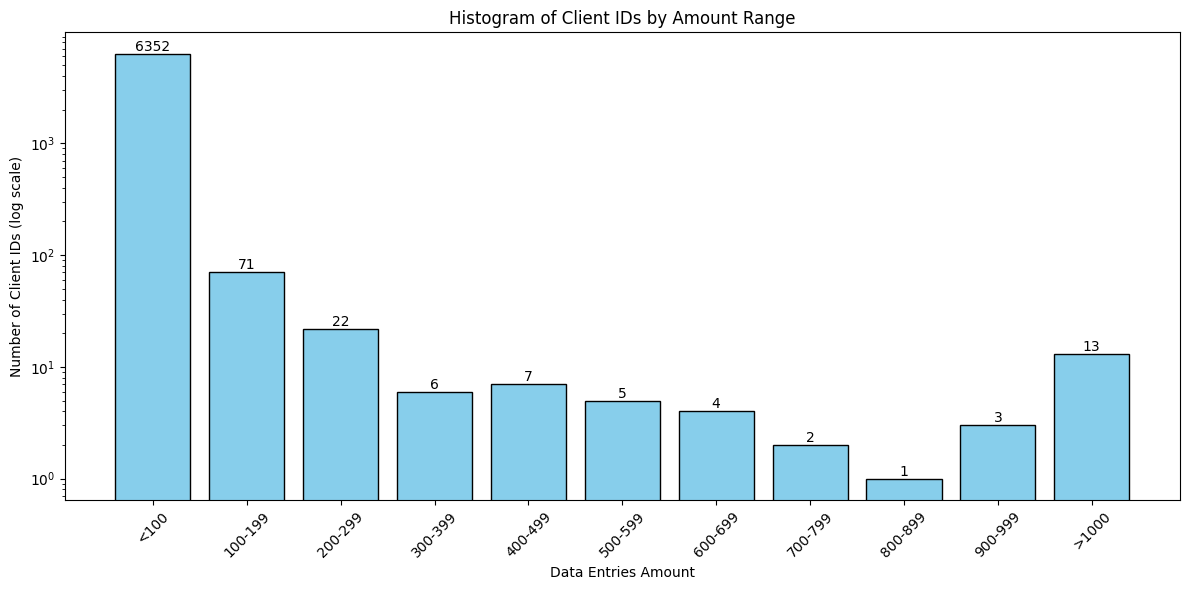

In [5]:
# Get client ID counts
client_id_counts = validated_data['client_id'].value_counts()

# Define the bins
bins = list(range(0, 1100, 100)) + [float('inf')]
bin_labels = ['<100'] + [f'{i}-{i+99}' for i in range(100, 1000, 100)] + ['>1000']

# Initialize histogram data
hist_data = [0] * len(bin_labels)

for amount in client_id_counts:
    for i, upper in enumerate(bins[1:], start=1):
        # Use <= for the boundary that includes 1000
        if amount < upper or (upper == 1000 and amount == 1000):
            hist_data[i-1] += 1
            break

# Plot the histogram with log scale and value labels
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_labels, hist_data, width=0.8, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.yscale('log')
plt.xlabel('Data Entries Amount')
plt.ylabel('Number of Client IDs (log scale)')
plt.title('Histogram of Client IDs by Amount Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
print(f"Number of clients who have more than 100 data entries: {sum(hist_data[1:])}")
print(f"Number of clients who have less than 100 data entries: {hist_data[0]}")

Number of clients who have more than 100 data entries: 134
Number of clients who have less than 100 data entries: 6352
